In [3]:
import json
import requests
import math

from datetime import datetime
from datetime import timedelta

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import pandas as pd

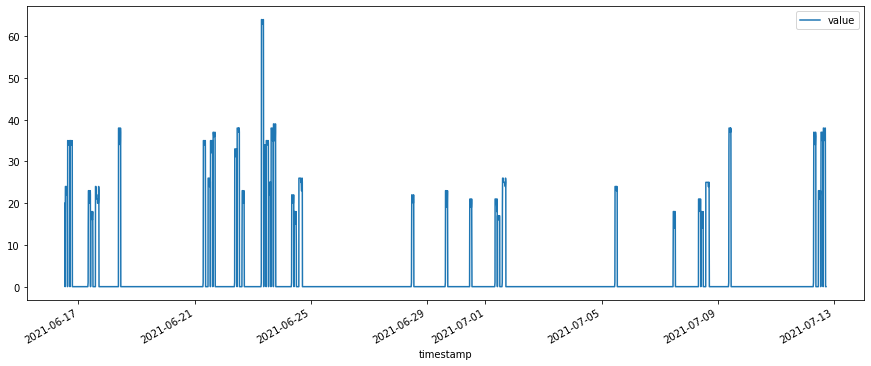

In [4]:
countDataOrig = pd.read_json("timeseries.json")
#countDataOrig['timestamp'].min(),countDataOrig['timestamp'].max()
countDataOrig = countDataOrig.sort_values('timestamp')
countDataOrig.isnull().sum()
countDataOrig = countDataOrig.groupby('timestamp')
countDataOrig = countDataOrig.max().reset_index()
countDataOrig = countDataOrig.set_index('timestamp')
countDataOrig.plot(figsize=(15,6))
plt.show()

Resample Data

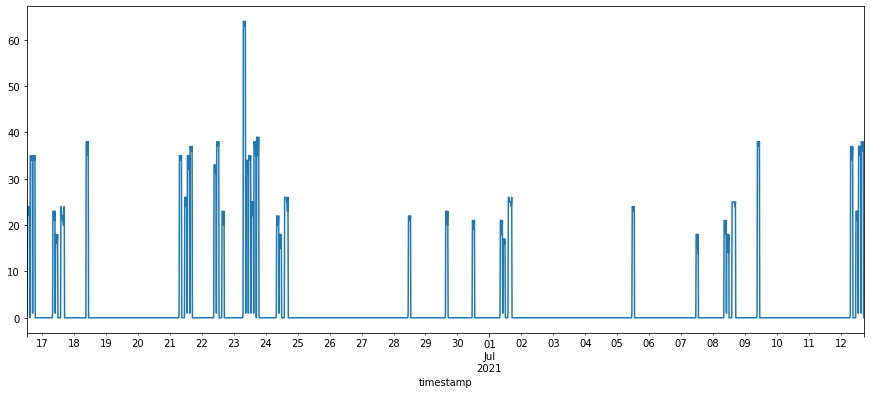

In [9]:
ts = countDataOrig['value'].resample('T').bfill()
#ts = np.log1p(ts)
countData = ts.resample('15T').bfill()
countData.plot(figsize=(15,6))
plt.show()

Truncate Data

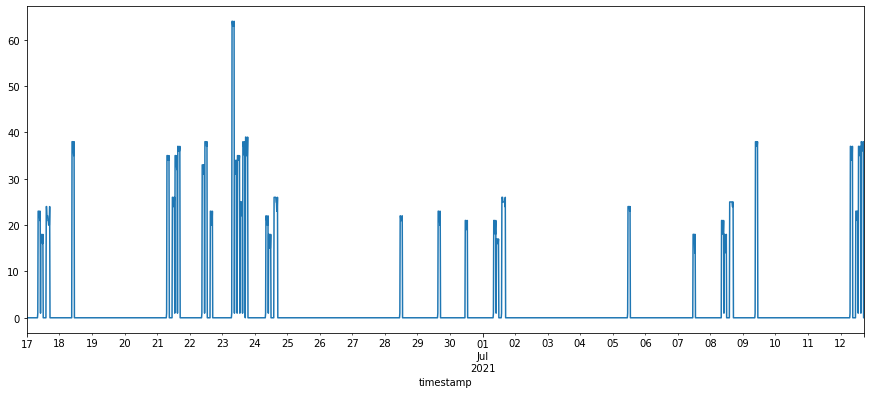

In [10]:
start_date = datetime(2021,6,17)
end_date = datetime(2021,7,11)
lim_countData = countData[start_date:]
lim_countData.plot(figsize=(15,6))
plt.show()

Add features

In [11]:


def rbf(x, i,alpha, t):
    term = x-i
    term = np.power(term,2)
    term = -(1/(2*alpha))*term
    term = np.exp(term)
    term = np.mod(term, t)
    return term


In [12]:
data = lim_countData
first_data = datetime(2021,6,16)
df_w_features = data.to_frame()

#Trend Features
#df_w_features.insert(1,"weekNumber",(((data.index-first_data).days/7).astype(int)),True)

#df_w_features.insert(1,"hoursSincebeginning",(((data.index-first_data).days*86400+(data.index-first_data).seconds)/3600),True)
#df_w_features.insert(1,"1throughxDaysSinceBeginning",(1/(0.1+(((data.index-first_data).days*86400+(data.index-first_data).seconds)/(3600*24)))),True)



#Weekly Features
for i in range(7):
    df_w_features["day"+str(i)] = data.index.dayofweek.map(lambda x: rbf(x,i,0.1, 7))

for i in range(24):
    df_w_features["hour"+str(i)] = data.index.hour.map(lambda x: rbf(x,i,0.1, 24))



for i in range(672):
    df_w_features["timeinterval"+str(i)] = ((data.index.dayofweek*24*60+data.index.hour*60+data.index.minute)/15).map(lambda x: rbf(x,i,2,672))


df_w_features


,value,day0,day1,day2,day3,day4,day5,day6,hour0,hour1,...,timeinterval662,timeinterval663,timeinterval664,timeinterval665,timeinterval666,timeinterval667,timeinterval668,timeinterval669,timeinterval670,timeinterval671
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-17 00:00:00,0,2.862519e-20,2.061154e-09,6.737947e-03,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.000000,0.006738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-17 00:15:00,0,2.862519e-20,2.061154e-09,6.737947e-03,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.000000,0.006738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-17 00:30:00,0,2.862519e-20,2.061154e-09,6.737947e-03,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.000000,0.006738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-17 00:45:00,0,2.862519e-20,2.061154e-09,6.737947e-03,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.000000,0.006738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-17 01:00:00,0,2.862519e-20,2.061154e-09,6.737947e-03,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,0.006738,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-12 16:15:00,37,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.804851e-35,5.166421e-55,6.714184e-79,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-12 16:30:00,36,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.804851e-35,5.166421e-55,6.714184e-79,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-12 16:45:00,38,1.000000e+00,6.737947e-03,2.061154e-09,2.862519e-20,1.804851e-35,5.166421e-55,6.714184e-79,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


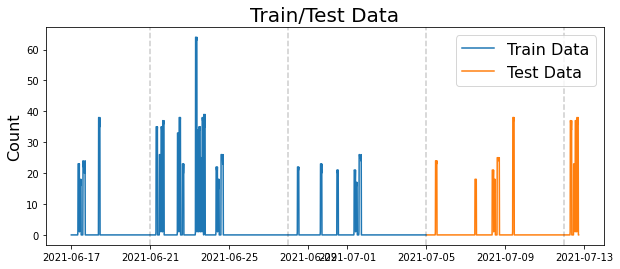

In [13]:
train_end = datetime(2021,7,5)
test_end = datetime(2021,7,13)
train_start = datetime(2021,6,25)
train_data = df_w_features[:train_end]
test_data = df_w_features[train_end + timedelta(hours=1):test_end]

plt.figure(figsize=(10,4))

plt.plot((train_data["value"]))
plt.plot((test_data["value"]))

#plt.plot(np.expm1(train_data["value"]))
#plt.plot(np.expm1(test_data["value"]))

plt.legend(('Train Data', 'Test Data'), fontsize=16)

plt.title('Train/Test Data', fontsize=20)
plt.ylabel('Count', fontsize=16)

plt.axvline(pd.to_datetime('2021-06-21'), color='k', linestyle='--', alpha=0.2)
plt.axvline(pd.to_datetime('2021-06-28'), color='k', linestyle='--', alpha=0.2)
plt.axvline(pd.to_datetime('2021-07-05'), color='k', linestyle='--', alpha=0.2)
plt.axvline(pd.to_datetime('2021-07-12'), color='k', linestyle='--', alpha=0.2)

data = train_data

In [14]:
from sklearn.linear_model import LinearRegression

Train_Y = train_data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Train_X = train_data.iloc[:, 1:].values  # values converts it into a numpy array


Test_Y = test_data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Test_X = test_data.iloc[:, 1:].values  # values converts it into a numpy array

#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X, Y)  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
#Y_pred


In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr = regr.fit(Train_X, Train_Y)

In [17]:
#regr = pickle.load(open("linear_model.pkl", 'rb'))
#result_loaded = regr.score(Test_X, Test_Y)
#print(result_loaded)

In [22]:



# Make predictions using the training set
y_pred = regr.predict(Train_X)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error((Train_Y), (y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('R2 Score: %.2f'
      % r2_score(Train_Y, y_pred))

print("Test Score:")
print(regr.score(Test_X, Test_Y))
print("Train Score:")
print(regr.score(Train_X, Train_Y))


Mean squared error: 33.86
R2 Score: 0.62
Test Score:
0.21983437188530408
Train Score:
0.6233745650868753


<AxesSubplot:xlabel='timestamp'>

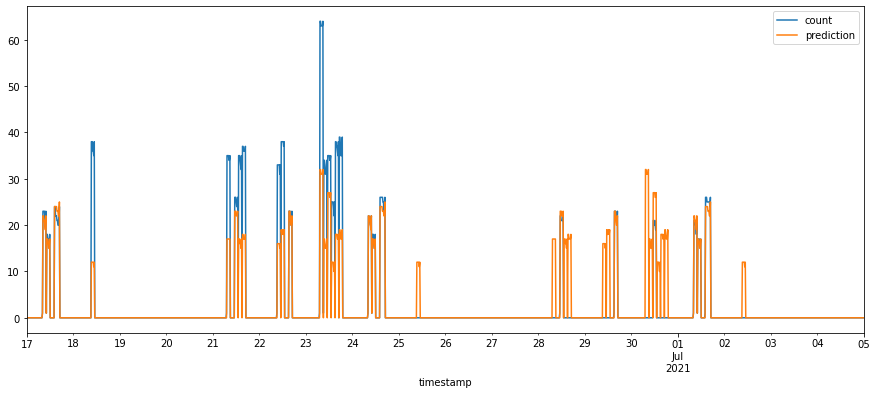

In [19]:
results = pd.DataFrame(data=(Train_Y), columns=["count"], index=train_data.index)
results["prediction"] = (y_pred.astype(int))
results = results.tz_localize('CET')
results.plot(figsize=(15,6))

In [20]:
# Make predictions using the test set
y_pred = regr.predict(Test_X)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error((Test_Y), (y_pred.astype(int))))
# The coefficient of determination: 1 is perfect prediction
print('R2 Score: %.2f'
      % r2_score(Test_Y, y_pred.astype(int)))

Mean squared error: 55.74
Coefficient of determination: 0.24


<AxesSubplot:xlabel='timestamp'>

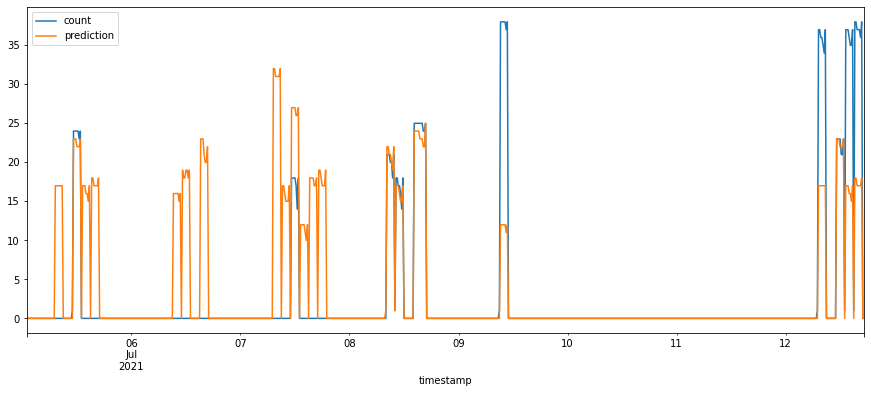

In [21]:
results_test = pd.DataFrame(data=(Test_Y), columns=["count"], index=test_data.index)
results_test["prediction"] = (y_pred.astype(int))
results_test.plot(figsize=(15,6))

In [147]:

pickle.dump(regr, open("linear_test.pkl", 'wb'))

In [148]:
loaded = pickle.load(open("linear_test.pkl", 'rb'))
result_loaded = loaded.score(Test_X, Test_Y)
print(result_loaded)

0.21983437188530408


In [149]:
#print(loaded.conf_int(0.01))   # 99% confidence interval

,0
2021-07-15 08:15:00,22
2021-07-15 08:30:00,22
2021-07-15 08:45:00,21
2021-07-15 09:00:00,21


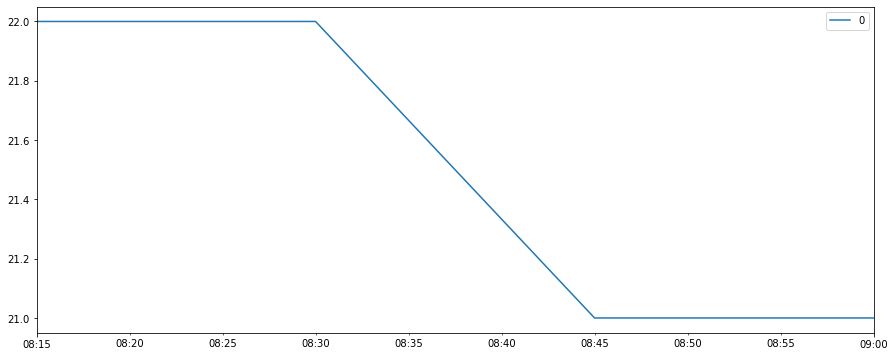

In [189]:
def predict_time(daterange):
    daterange = pd.DataFrame(index=daterange)
    for i in range(7):
        daterange["day"+str(i)] = daterange.index.dayofweek.map(lambda x: rbf(x,i,0.1, 7))
    for i in range(24):
        daterange["hour"+str(i)] = daterange.index.hour.map(lambda x: rbf(x,i,0.1, 24))
    for i in range(672):
        daterange["timeinterval"+str(i)] = ((daterange.index.dayofweek*24*60+daterange.index.hour*60+daterange.index.minute)/15).map(lambda x: rbf(x,i,2,672))
    return pd.DataFrame(data=loaded.predict(daterange).astype(int),index=daterange.index)
    
test2 = pd.date_range('2021-07-15 08:15:00',periods=4,freq='15T')
prediction_future = predict_time(test2)
prediction_future.plot(figsize=(15,6))
prediction_future

In [152]:
(prediction_future.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1ms')

Int64Index([1625577300000, 1625578200000, 1625579100000, 1625580000000,
            1625580900000, 1625581800000, 1625582700000, 1625583600000,
            1625584500000, 1625585400000,
            ...
            1625703300000, 1625704200000, 1625705100000, 1625706000000,
            1625706900000, 1625707800000, 1625708700000, 1625709600000,
            1625710500000, 1625711400000],
           dtype='int64', length=150)

In [190]:
#1480: arima
#1481: linear
#1482: pytorch
import json
import time

i=0
published=0

for index,row in prediction_future.iterrows():
    client1.connect(broker,port,keepalive=60)
    prediction_count = int(row[0])
    prediction_timestamp = (index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1ms')
    payload = {
        "username": "group8_2021_ss",
        "prediction_linear": prediction_count,
      "device_id": 119,
       "timestamp": prediction_timestamp
    }

    payload_string = json.dumps(payload)
    
    ret = client1.publish("44_119",payload_string)
    print(i)
    client1.disconnect()
    i+=1
    time.sleep(0.2)




#


data published: %d 
 0
0
data published: %d 
 0
1
data published: %d 
 0
2
data published: %d 
 0
3


In [209]:
def mapToCorrectTimes(hour, x):
    if x<15:
        return hour, 15
    elif x<30:
        return hour, 30
    elif x<45:
        return hour, 45
    else:
        return hour+1, 0


,0
2021-07-15 11:00:00,16
